In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.options.display.float_format = '{:.4f}'.format

In [3]:
kickstarter = pd.read_csv('./ks-projects-201801.csv')
kickstarter.shape

(378661, 15)

In [4]:
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [7]:
kickstarter.head(60)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0000,2016-02-26 13:38:27,52375.0000,successful,224,US,52375.0000,52375.0000,50000.0000
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0000,2014-12-01 18:30:44,1205.0000,successful,16,US,1205.0000,1205.0000,1000.0000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0000,2016-02-01 20:05:12,453.0000,failed,40,US,453.0000,453.0000,25000.0000
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0000,2014-04-24 18:14:43,8233.0000,canceled,58,US,8233.0000,8233.0000,125000.0000
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0000,2014-07-11 21:55:48,6240.5700,canceled,43,US,6240.5700,6240.5700,65000.0000


In [5]:
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.0000,378661.0000,378661.0000,378661.0000,374864.0000,378661.0000,378661.0000
mean,1074731191.9888,49080.7915,9682.9793,105.6175,7036.7289,9058.9241,45454.4015
std,619086204.3226,1183391.2591,95636.0100,907.1850,78639.7453,90973.3431,1152950.0551
min,5971.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0100
25%,538263516.0000,2000.0000,30.0000,2.0000,16.9800,31.0000,2000.0000
50%,1075275634.0000,5200.0000,620.0000,12.0000,394.7200,624.3300,5500.0000
75%,1610148624.0000,16000.0000,4076.0000,56.0000,3034.0900,4050.0000,15500.0000
max,2147476221.0000,100000000.0000,20338986.2700,219382.0000,20338986.2700,20338986.2700,166361390.7100


In [6]:
kickstarter.state.value_counts()
# cancellation is done by the project owner, 
# suspension is done by kickstarter itself

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [8]:
kickstarter.state.value_counts(normalize=True)
# this gives you fractions so 52% failed, 35 are succesfull

failed       0.5222
successful   0.3538
canceled     0.1024
undefined    0.0094
live         0.0074
suspended    0.0049
Name: state, dtype: float64

In [9]:
kickstarter_classify = kickstarter[kickstarter.state.isin(['failed', 'successful'])]
kickstarter_classify.state.value_counts(normalize=True)
# 60, 40 split is okay, even 70, 30 could be okay for this method
# you would not say this is imbalanced 

failed       0.5961
successful   0.4039
Name: state, dtype: float64

In [10]:
kickstarter_classify.shape

(331675, 15)

In [11]:
kickstarter_classify.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [12]:
pd.crosstab(kickstarter_classify.main_category,
            kickstarter_classify.state)
# same as pivot table

state,failed,successful
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


In [13]:
category_crosstab = pd.crosstab(kickstarter_classify.main_category,
                                kickstarter_classify.state)
category_crosstab['success_rate'] = category_crosstab.successful / (category_crosstab.successful+category_crosstab.failed)
category_crosstab

# so succes rate means succesfully funded
# it could depend e.g. on the mean of the goal, maybe this has a 
# lower goal mean and therefore, it is succesfull easier?

state,failed,successful,success_rate
main_category,,,
Art,14131,11510,0.4489
Comics,4036,5842,0.5914
Crafts,5703,2115,0.2705
Dance,1235,2338,0.6544
Design,14814,10550,0.4159
Fashion,14182,5593,0.2828
Film & Video,32904,23623,0.4179
Food,15969,6085,0.2759
Games,16003,12518,0.4389


In [14]:
kickstarter_classify.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [15]:
currency_crosstab = pd.crosstab(kickstarter_classify.currency,kickstarter_classify.state)
currency_crosstab['success_rate'] = currency_crosstab.successful/(currency_crosstab.successful+currency_crosstab.failed)
currency_crosstab

state,failed,successful,success_rate
currency,,,
AUD,4610,2011,0.3037
CAD,8238,4137,0.3343
CHF,465,187,0.2868
DKK,567,362,0.3897
EUR,10496,3882,0.2700
GBP,17395,12081,0.4099
HKD,261,216,0.4528
JPY,16,7,0.3043
MXN,1015,396,0.2807


In [16]:
kickstarter_classify['launched_date'] = pd.to_datetime(kickstarter_classify.launched)
kickstarter_classify['deadline_date'] = pd.to_datetime(kickstarter_classify.deadline)
kickstarter_classify['duration'] = (kickstarter_classify.deadline_date - kickstarter_classify.launched_date).dt.days
kickstarter_classify.head()

/Users/michelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/michelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/michelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015-08-11 12:12:28,2015-10-09,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017-09-02 04:43:57,2017-11-01,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013-01-12 00:20:50,2013-02-26,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000,2012-03-17 03:24:11,2012-04-16,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0000,2016-02-26 13:38:27,52375.0000,successful,224,US,52375.0000,52375.0000,50000.0000,2016-02-26 13:38:27,2016-04-01,34


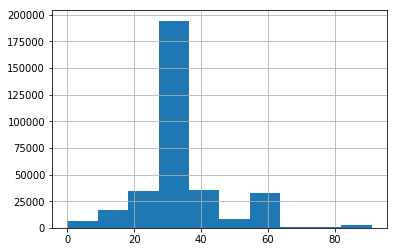

In [17]:
kickstarter_classify.duration.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd89460a630>,
      dtype=object)

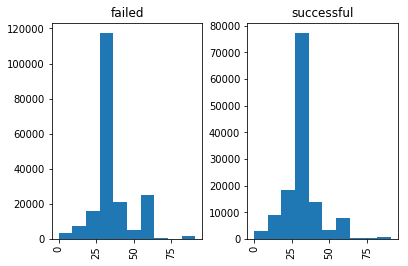

In [18]:
kickstarter_classify.duration.hist(by=kickstarter_classify.state)

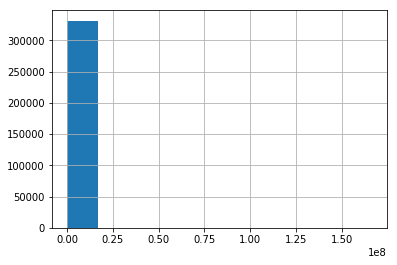

In [19]:
kickstarter_classify.usd_goal_real.hist()
# 1 is 100 mln
# you don't see the outliers here
# almost all projects are in the first bin

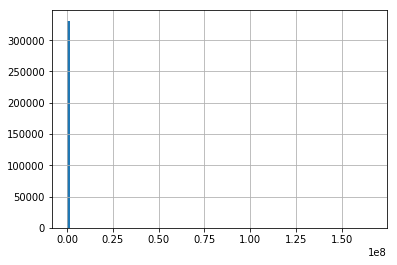

In [20]:
kickstarter_classify.usd_goal_real.hist(bins=100)
# still you only see the projects below (around) 1 mln dollars

In [21]:
max(kickstarter_classify.usd_goal_real)

166361390.71

In [22]:
kickstarter_classify[kickstarter_classify.usd_goal_real > 1000000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,1000000.0000,2015-09-10 23:03:21,10.0000,failed,1,IT,11.1800,10.7600,1076403.0900,2015-09-10 23:03:21,2015-11-09,59
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0000,2017-08-19 22:13:55,2242.0000,failed,19,CA,1160.6700,1794.4600,1600768.3700,2017-08-19 22:13:55,2017-10-18,59
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.0000,2014-08-15 20:16:22,4.0000,failed,2,US,4.0000,4.0000,3000000.0000,2014-08-15 20:16:22,2014-10-14,59
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,1000000.0000,2015-10-21 22:00:04,10.0000,failed,1,GB,15.4700,15.0500,1505185.3600,2015-10-21 22:00:04,2015-11-25,34
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0000,2014-06-21 22:34:21,285.0000,failed,5,CA,263.4100,264.6700,3575408.6200,2014-06-21 22:34:21,2014-07-21,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377201,992624421,I don't know a comic book?,Comics,Comics,USD,2014-08-09,10000000.0000,2014-07-10 06:11:48,10.0000,failed,1,US,10.0000,10.0000,10000000.0000,2014-07-10 06:11:48,2014-08-09,29
377444,993969686,Albert Einstein Museum,Technology,Technology,USD,2014-12-20,50000000.0000,2014-10-23 01:46:17,240.0000,failed,8,US,240.0000,240.0000,50000000.0000,2014-10-23 01:46:17,2014-12-20,57
377649,994971752,Love Revolution 24,Country & Folk,Music,USD,2015-02-24,39023437.0000,2015-01-31 09:05:34,5.0000,failed,5,US,5.0000,5.0000,39023437.0000,2015-01-31 09:05:34,2015-02-24,23
378165,997671931,Food for FREE,Farms,Food,AUD,2014-12-08,4500000.0000,2014-11-24 02:13:49,0.0000,failed,0,AU,0.0000,0.0000,3721161.0000,2014-11-24 02:13:49,2014-12-08,13


In [23]:
kickstarter_classify[kickstarter_classify.usd_goal_real > 1000000].state.value_counts()
# strategy: create cutoff after the last successful project 
# strategy: outliers, limit these numbers (of failures), are these
# serious projects, or just jokes?
# because there are successful projects we will leave them in,
# even though the outlier will influence results

failed        829
successful     11
Name: state, dtype: int64

In [24]:
kickstarter_classify.corr()
# will help eliminate some columns, so variables that are highly
# correlated with each other, you can choose 1 of those
# in this example, backers and usd pledged (real)
# goal and usd goal real

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.0000,0.0019,0.0009,0.0008,-0.0003,0.0003,0.0018,0.0028
goal,0.0019,1.0000,0.0080,0.0048,0.0064,0.0060,0.9526,0.0227
pledged,0.0009,0.0080,1.0000,0.7173,0.8580,0.9536,0.0057,0.0081
backers,0.0008,0.0048,0.7173,1.0000,0.6975,0.7523,0.0052,-0.0000
usd pledged,-0.0003,0.0064,0.8580,0.6975,1.0000,0.9077,0.0070,0.0077
usd_pledged_real,0.0003,0.0060,0.9536,0.7523,0.9077,1.0000,0.0064,0.0087
usd_goal_real,0.0018,0.9526,0.0057,0.0052,0.0070,0.0064,1.0000,0.0216
duration,0.0028,0.0227,0.0081,-0.0000,0.0077,0.0087,0.0216,1.0000


In [ ]:
# difference usd pledged, usd pledged real, difference is the ..

In [25]:
kickstarter_classify.isnull().sum(axis = 0)

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

In [27]:
#keep identified relevant features
kickstarter_variables = kickstarter_classify[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]

kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'])
kickstarter_y

# if you don't use drop_first=true than you get 2 columns, so you
# only want one column suggesting that if it is NOT succesfull, 
# it is failed, so you don't need two columns

,failed,successful
0,1,0
1,1,0
2,1,0
3,1,0
5,0,1
...,...,...
378654,1,0
378657,1,0
378658,1,0
378659,1,0


In [28]:
kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'], drop_first=True)
kickstarter_y['successful'].value_counts()

# drop first is not only for 2 variables, you can also use these
# for multiple variables, if columns are 100% co-correlated, you
# don't need both, it reduces calculation time, and partly noise

0    197719
1    133956
Name: successful, dtype: int64

In [29]:
kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns=['main_category', 'currency'], drop_first=True)
kickstarter_x.head()

,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.9500,0,58,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0000,15,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0000,3,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0000,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0000,224,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(kickstarter_x, kickstarter_y, test_size=0.2)

# random_state=N, if you want to have reproducable results 
# you can select any number



In [32]:
X_train.shape
# same for y_train but only one column

(265340, 30)

In [33]:
X_test.shape
# same y_test but only one column

(66335, 30)

In [ ]:
# Hurrray! Finally!
# data is prepared (cleaned) and we can start building models

In [34]:
# first model: logistic regression
from sklearn.linear_model import LogisticRegression
ks_model = LogisticRegression().fit(X_train, y_train)
# data is not in right format

/Users/michelle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
np.ravel(y_train)
# transforms y_train into an array

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [37]:
ks_model = LogisticRegression().fit(X_train, np.ravel(y_train))

In [38]:
from sklearn.metrics import confusion_matrix

y_pred_test = ks_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

# True Positives: 37711
# True Negatives: 22375

array([[37711,  1850],
       [ 4399, 22375]])

In [39]:
y_pred_test

array([0, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [40]:
accuracy_lr = (37711+22375)/(37711+1850+22375+4399)
accuracy_lr
# whether or not a project on kickstarter will be successfull
# or not

0.9057963367754579

/Users/michelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


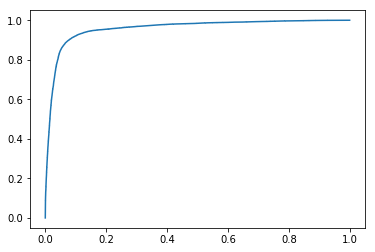

In [41]:
from sklearn import metrics
 
y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba)
 
plt.plot(fpr,tpr)
# if the line would go straight up, this would mean that it
# is 100% right
# evaluation & area under the curve look further into next lab

In [42]:
auc_lr

# so the accuracy of the confusion matrix can be used but also
# area under the curve 
# 2 metrics so far

# so how can you increase your accuracy, depends on:
# what algorithm you choose
# what features you choose
# do you have an imbalanced data set? can you make it more balanced?

0.9576640484097463

In [43]:
#Now let's try a decision tree - in fact let's try a whole forest
from sklearn.ensemble import RandomForestClassifier
 
ks_rf = RandomForestClassifier().fit(X_train, np.ravel(y_train))

/Users/michelle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[36995,  2566],
       [ 2663, 24111]])

In [45]:
accuracy_rf = (36995+24111)/(36995+2663+24111+2566)
accuracy_rf

0.9211728348533956

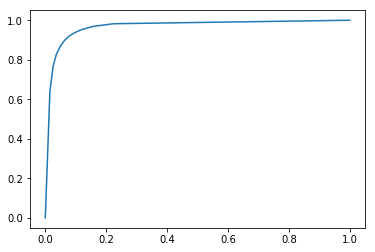

In [46]:
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba_rf)
 
plt.plot(fpr,tpr)

In [47]:
auc_rf

0.9670871917675512

In [ ]:
# usually if you get a very different result if you use a different
# train test split, it probably means you don't have enough datapoints